# the methods

In [206]:
import time

#### jacobi

In [207]:
import numpy as np

def jacobi(A, b, tolerance):
    xk_1 = np.zeros_like(b)
    D = np.diag(A)
    LplusU = A - np.diag(D)
 
    #this will be vector 
    # LplusU @ xk_1 >>> vector 
    x_k = (b - (LplusU @ xk_1)) / D
    
    while (np.linalg.norm((x_k - xk_1) , 2) / np.linalg.norm(x_k , 2)) > tolerance:
        xk_1 = x_k
        x_k = (b - (LplusU @ xk_1)) / D
    
    return x_k

#### siedel

In [208]:
import numpy as np

def siedel(A, b, tolerance):
    xk_1 = np.zeros_like(b)
    LandD = np.tril(A)
    U = A - LandD

    LandDinv = np.linalg.inv(LandD)
    
    x_k = LandDinv @ (b - U @ xk_1)
    
    while (np.linalg.norm((x_k - xk_1) , 2) / np.linalg.norm(x_k , 2)) > tolerance:
        xk_1 = x_k
        x_k = LandDinv @ (b - U@xk_1)
    
    return x_k

#### powermethod

In [209]:
def powerMethod(A,tolerance):
    xk_1 = np.random.rand(A.shape[0])
    
    p = (A @ xk_1) 
    x_k = p / max(p)
    while (np.linalg.norm((x_k - xk_1) , 2) / np.linalg.norm(x_k , 2)) > tolerance:
        xk_1 = x_k
        p = (A @ xk_1) 
        x_k = p / max(p)    
    
    lmbda = max(A @ x_k) 
    
    return x_k , lmbda

In [210]:
tolerance = 1e-5

### Q1
Figure 1 is a diagram of a maze used in a laboratory 
experiment. The experiment is begun by placing a mouse 
at one of the ten interior intersections of the maze. Once 
the mouse emerges in the outer corridor, it cannot return 
to the maze. When the mouse is at an interior 
intersection, its choice of paths is assumed to be 
random. What is the probability that the mouse will 
emerge in the “food corridor” when it begins at the th 
intersection?
<br>
Hint:
Let the mouse be at intersection 1, the probability of 
winning starting at this intersection is . Starting from 
intersection 1, the probability of choosing the upper right 
path is but it will lose because it is not the food 
corridor, so the probability of winning is , and 
the probability of winning by choosing the upper left path 
is also and the probability of winning by 
choosing the lower right path is (that we do 
not know yet) and similarly, the probability of winning by 
choosing the left lower path is . Now, we can 
write the probability of winning starting at intersection 1 
 as following:
 
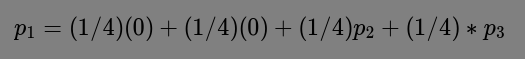
Now make the variables on one side and all scalars on 
the other side and you get:
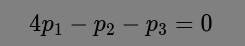
You repeat this step for all 10 intersections and build a 
system of linear equations. Use Jacobi's method and 
Gauss-Seidel method to find the vector which 
represents the ten probabilities of winning starting from 
each intersection. Which method converges faster?

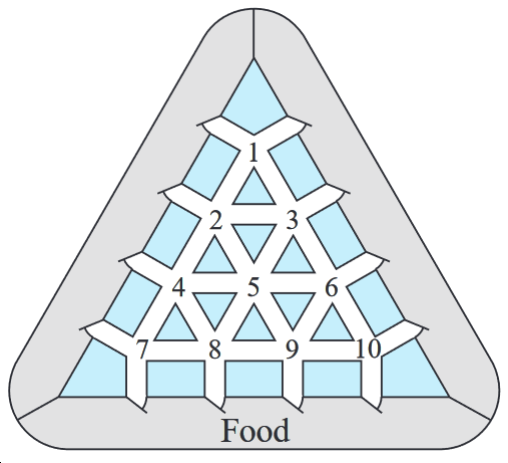

P1 = p0 | P0 | p2 | p3 |<br>
P2 = p0 | P1 | p3 | p4 | p5<br>
P3 = p0 | P1 | p2 | p5 | p6<br>
P4 = p0 | P2 | p5 | p7 | p8<br>
P5 = p2 | P3 | p4 | p6 | p8 | P9<br>
P6 = p0 | P3 | p5 | p9 | p10<br>
P7 = p0 | PF | p8 | p4<br>
P8 = p4 | P5 | p9 | p7 | pF<br>
P9 = p5 | P7 | p8 | pF | p10<br>
P10= p0 | PF | p6 | p9<br>

In [211]:
A = np.array([
4, -1, -1, 0, 0, 0, 0, 0, 0, 0, 
-1, 5, -1, -1, -1, 0, 0, 0, 0, 0, 
-1, -1, 5, 0, -1, -1, 0, 0, 0, 0, 
0, -1, 0, 5, -1, 0, -1, -1, 0, 0, 
0, -1, -1, -1, 6, -1, 0, -1, -1, 0, 
0, 0, -1, 0, -1, 5, 0, 0, -1, -1, 
0, 0, 0, -1, 0, 0, 4, -1, 0, 0, 
0, 0, 0, -1, -1, 0, -1, 5, -1, 0, 
0, 0, 0, 0, -1, -1, 0, -1, 5, -1, 
0, 0, 0, 0, 0, -1, 0, 0, -1, 4, ]).reshape(10,10)

In [212]:
b = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [222]:
start_time_jacobi = time.time()
print(jacobi(A, b, 1e-8).reshape(10,1))
end_time_jacobi =  time.time()
jacobi_time = end_time_jacobi-start_time_jacobi

[[0.09019607]
 [0.18039214]
 [0.18039214]
 [0.2980392 ]
 [0.33333332]
 [0.2980392 ]
 [0.45490195]
 [0.52156861]
 [0.52156861]
 [0.45490195]]


In [223]:
start_time_siedel = time.time()
print(siedel(A, b,1e-8 ).reshape(10,1))
end_time_siedel =  time.time()
siedel_time = end_time_siedel - start_time_siedel

[[0.09019607]
 [0.18039215]
 [0.18039215]
 [0.29803921]
 [0.33333333]
 [0.29803921]
 [0.45490196]
 [0.52156862]
 [0.52156862]
 [0.45490196]]


In [225]:
print(f'jacobi time was {jacobi_time}\nsiedel time was {siedel_time}\nthere for siedel is faster with {jacobi_time/siedel_time*100}%')

jacobi time was 0.003000497817993164
siedel time was 0.0010004043579101562
there for siedel is faster with 299.92850333651097%


### Question 2 (Easy)
Use the power method with scaling to find a stable eigenvector and eigenvalue 
of the following matrices:

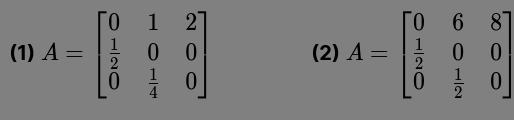

Check if the calculated eigenvalue and eigenvector are correct.

##### (1)

In [189]:
A1 = np.array([0,1,2,.5,0, 0,0,.25,0]).reshape(3,3)
v,lmbda = powerMethod(A1,1e-8)
print(f'the stable eigenvalu is {lmbda} and corresponding  eeigenvector is {v}')

the stable eigenvalu is 0.8846461800959531 and corresponding  eeigenvector is [1.         0.56519772 0.15972423]


**Check if the calculated eigenvalue and eigenvector are correct.**

In [191]:
A, V = np.linalg.eig(A1)
print(f'the correct eigenvalue is {np.real(A[0])} and the corresponding vector is {np.real(V[:, 0])/max(abs(V[:, 0]))}')

the correct eigenvalue is 0.8846461771193156 and the corresponding vector is [-1.         -0.56519772 -0.15972423]


##### (2)

In [192]:
A2 = np.array([0,6,8,.5,0,0,0,.5,0]).reshape(3,3)
v,lmbda = powerMethod(A2,1e-8)
print(f'the stable eigenvalu is {lmbda} and corresponding  eeigenvector is {v}')

the stable eigenvalu is 2.0000000091146717 and corresponding  eeigenvector is [1.     0.25   0.0625]


**Check if the calculated eigenvalue and eigenvector are correct.**

In [193]:
A, V = np.linalg.eig(A2)
print(f'the correct eigenvalue is {np.real(A[0])} and the corresponding vector is {np.real(V[:, 0])/max(abs(V[:, 0]))}')

the correct eigenvalue is 2.0000000000000013 and the corresponding vector is [-1.     -0.25   -0.0625]
